[array([1.98726097, 0.90144281]), array([-1.73102222,  7.43349916]), array([-0.33514647,  3.62624134]), array([-0.89247947,  8.18394342])]
[0, 1, 2, 3, 0, 0, 2, 2, 3, 3, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 1, 0, 2, 0, 3, 0, 0, 2, 3, 2, 1, 0, 1, 2, 3, 2, 2, 2, 1, 0, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0, 0, 3, 2, 0, 2, 1, 1, 2, 0, 3, 2, 2, 2, 0, 0, 2, 2, 3, 0, 3, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 3, 2, 2, 0, 1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 3, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 3, 0, 2, 2, 3, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 3, 3, 2, 2, 3, 2, 0, 2, 2, 0, 2, 3, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 3, 2, 2, 3, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 3, 1, 0, 0, 2, 0, 0, 0, 1,

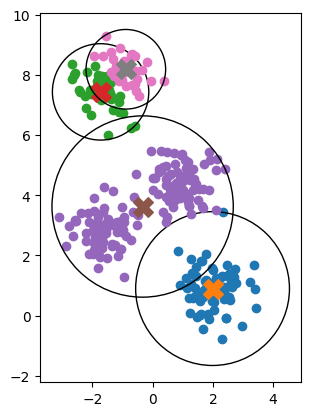

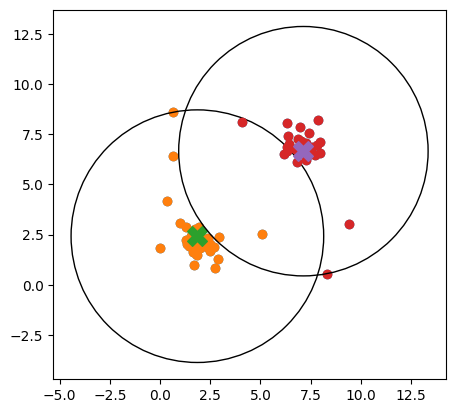

In [20]:
# cluster basado en centroides
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def distancia(x,u):
    d = 0.0
    for j in range(len(x)):
        d +=((x[j]-u[j])**2)
    return d

def kmeans(x,K,N=1000):
    n = len(x)
    d = len(x[0])
    centros = []    
    cluster = []
    for k in range(K):
        centros.append(x[k].copy())
    asignaciones = [0]*n
    for it in range(N):
        cambio = False
        for i in range(n):
            cluster_cercano = None
            mejor_distancia = None
            for k in range(K):
                dis = distancia(x[i],centros[k])
                if mejor_distancia is None or dis < mejor_distancia:
                    mejor_distancia = dis
                    cluster_cercano = k
            if asignaciones[i]!=cluster_cercano:
                cambio = True
            asignaciones[i] = cluster_cercano
        nuevos_centros = []
        conteos = []
        for j in range(K):
            nuevos_centros.append([0]*d) 
            conteos.append(0)
        for i in range(n):
            ind_cluster = asignaciones[i] # el punto i pertenece al cluster "cluster"
            conteos[ind_cluster] +=1 # conteo[cluster especifico] aumenta, es como progra dinamica
            for j in range(d): 
                nuevos_centros[ind_cluster][j]+=x[i][j] #x4 = (9, 8, 9, 8)
        for k in range(K):
            if conteos[k]>0:
                for j in range(d):
                    nuevos_centros[k][j]/=conteos[k]
        centros = []
        for k in range(K):
            centros.append(np.array(nuevos_centros[k],dtype=float)) 
        if not cambio:
            break
    for k in range(K):
        puntos = []
        for i in range(len(x)):
            if asignaciones[i]== k:
                puntos.append(x[i])
        puntos = np.array(puntos)
        if len(puntos) > 0:
            cluster.append({'k':k,'centro':centros[k],'puntos':puntos})
    return centros,asignaciones,cluster
 
def graficar_cluster(M,cluster): 
    for c in cluster: # dibujar
        puntos = c['puntos']
        centro = c['centro']
        plt.scatter(puntos[:,0],puntos[:,1])
        plt.scatter(centro[0],centro[1],marker='X',s=200)
        radio = 0.0
        for p in puntos:
            dx = p[0] - centro[0]
            dy = p[1] - centro[1]
            dist = (dx*dx + dy*dy)**0.5
            if dist > radio:
                radio = dist
        circulo = plt.Circle((centro[0], centro[1]), radio, fill=False)
        plt.gca().add_patch(circulo)
    plt.gca().set_aspect('equal')
    plt.show()
    
M, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
centros, asignaciones,cluster = kmeans(M,K=4)
print(centros)
print(asignaciones)
graficar_cluster(M,cluster) 


datos=[] 
for _ in range(30):
    datos.append([random.gauss(2,0.5),random.gauss(2,0.5)]) 
for _ in range(30):
    datos.append([random.gauss(7,0.5),random.gauss(7,0.5)]) 
for _ in range(10):
    datos.append([random.uniform(0,10),random.uniform(0,10)])  
datos = np.array(datos)
plt.scatter(datos[:,0],datos[:,1])
c, a, cc = kmeans(datos,K=2)
graficar_cluster(datos,cc)

C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


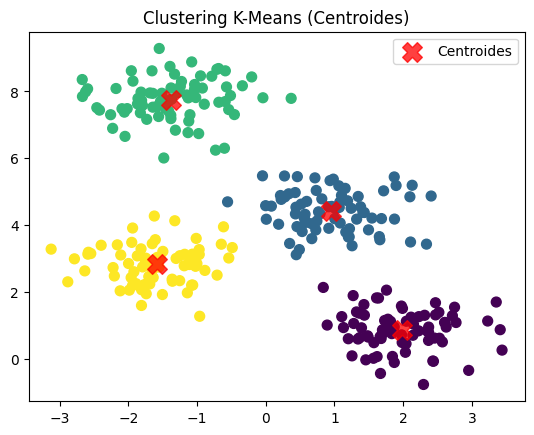

In [5]:
# KMEANS CON SKLEARN
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def kmeans_sklearn():
    # 1. Generar datos sintéticos (4 grupos definidos)
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
    # 2. Configurar y entrenar el modelo K-Means
    # Definimos k=4 porque sabemos que hay 4 grupos
    kmeans = KMeans(n_clusters=4, n_init='auto')
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centros = kmeans.cluster_centers_
    # 3. Visualización
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centros[:, 0], centros[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
    plt.title("Clustering K-Means (Centroides)")
    plt.legend()
    plt.show()
kmeans_sklearn()

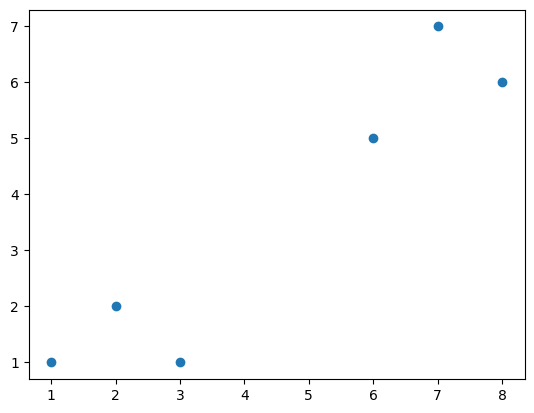

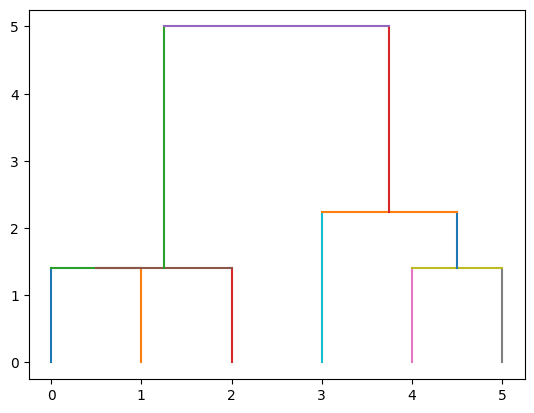


 [{'i': 0, 'j': 1, 'id': 6, 'd': 1.41, 'cluster': [array([1, 1]), array([2, 2])]}, {'i': 2, 'j': 6, 'id': 7, 'd': 1.41, 'cluster': [array([3, 1]), array([1, 1]), array([2, 2])]}, {'i': 4, 'j': 5, 'id': 8, 'd': 1.41, 'cluster': [array([7, 7]), array([8, 6])]}, {'i': 3, 'j': 8, 'id': 9, 'd': 2.24, 'cluster': [array([6, 5]), array([7, 7]), array([8, 6])]}, {'i': 7, 'j': 9, 'id': 10, 'd': 5.0, 'cluster': [array([3, 1]), array([1, 1]), array([2, 2]), array([6, 5]), array([7, 7]), array([8, 6])]}]


In [7]:
# JERARQUICO
import math
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def dist(p,q):
    d = 0.0
    for i in range(len(p)):
        d+=((p[i]-q[i])**2)
    return math.sqrt(d)
    
# d_cluster() calcula el minimo entre el punto A(cluster i) y cluster B(j ejemplo) , luego en  for j in range(i+1,len(clusters)) para las otras columnas(cluster)
#A      B      C      D      E      F
#A       -     1.41   2.00   6.40   8.48   8.60
#B             -      1.41   5.00   7.07   7.21
#C                    -      5.00   7.21   7.07
#D                           -      2.23   2.23
#E                                  -      1.41  #MÍNIMA GLOBAL = 1.41  (A-B)
#F                                         -
#mientras que  for i in range(len(clusters)): (el bucle exterior) realiza el calculo anterior para cada cluster 
#
def d_cluster(cl1,cl2):  # minimo entre todos los puntos del cluster i y los puntos del cluster j.   for i in range(len(clusters)): realiza el calcula elemento - columna mientras existan mas de 1 cluster
    minima = None
    for p in cl1:
        for q in cl2:
            d = dist(p,q)
            if minima is None or d < minima:
                minima = d
    return minima
#A = (1,1)
#B = (2,2)
#C = (3,1)
#D = (6,5)
#E = (7,7)
#F = (8,6)
def jerarquico_single(datos):
    _clusters = {}
    clusters = []
    for i in range(len(datos)):
        _clusters[i]  = [datos[i]]          # todos son clusters iniciales {A}   {B}   {C}   {D}   {E}   {F}
    cluster_id = len(datos)
    while len(_clusters)>1:                # hasta que tengamos un solo cluster
        mejor_distancia = float('inf')
        mejor_i = None
        mejor_j = None 
        ids = list(_clusters.keys())       # evaluando los puntos aun no pertenecen a cluster anteriores y el cluster nuevo ej indice 6,7..
        for i in range(len(ids)):
            for j in range(i+1,len(ids)): 
                d = d_cluster(_clusters[ids[i]],_clusters[ids[j]])      # distancia minima de los puntos del cluster i respecto a los puntos del  cluster j
                if d < mejor_distancia:
                    mejor_distancia = d
                    mejor_i = ids[i]           # si el cluster i tiene un punto mejor que el anterior
                    mejor_j = ids[j]           # en alguna iteracion tambien j cambiara o no.
        nuevo_cluster = _clusters[mejor_i] + _clusters[mejor_j] ## concatenacion , [[1,1],[2,2]] con sobrecarga de operador + 
        clusters.append({"i":mejor_i,"j":mejor_j,"id":cluster_id,"d":round(mejor_distancia,2),"cluster":nuevo_cluster})
        if mejor_i > mejor_j:
            _clusters.pop(mejor_i)        # si se elige 0 y 1 , los nuevos indices seran  clusters = {2,3,4,5,6} por ejemplo
            _clusters.pop(mejor_j)
        else:
            _clusters.pop(mejor_j) 
            _clusters.pop(mejor_i)        # pues ahora se analizan los demas puntos(cluster?)
        _clusters[cluster_id] = nuevo_cluster
        cluster_id+=1
    return clusters

def dendograma(clusters,n):
    x = {}
    for i in range(n):
        x[i] = i
    altura = {}
    for cluster in clusters:
        d = cluster["d"]
        i = cluster["i"]
        j = cluster["j"]
        id_ = cluster["id"]  
        x1 = x[i] 
        x2 = x[j]
        y1 = altura[i] if i in altura else 0
        y2 = altura[j] if j in altura else 0
        plt.plot([x1,x1],[y1,d])   # une el punto x1,y1  con x1,d  una linea vertical en este caso
        plt.plot([x2,x2],[y2,d])
        plt.plot([x1,x2],[d,d])     # horizontal dentre x1,d    x2,d  
        x[id_] = (x1 + x2)/2        # id_ es el el id del cluster union de (ej) A y B , entonces su abscisa es el promedio de los Ax, Bx
        altura[id_] = d 
    plt.show()
datos = np.array([[1,1], [2,2], [3,1], [6,5], [7,7], [8,6]])
#datos = np.array([[1,1],[1.2,1.1],[0.8,1.2],[1.1,0.9],[5,5],[5.2,5.1],[4.8,4.9],[5.1,4.7],[9,1],[9.2,1.1],[8.8,0.9],[9.1,1.3]])
#datos, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(datos[:,0],datos[:,1])
plt.show()
clusters = jerarquico_single(datos)
dendograma(clusters,len(datos))


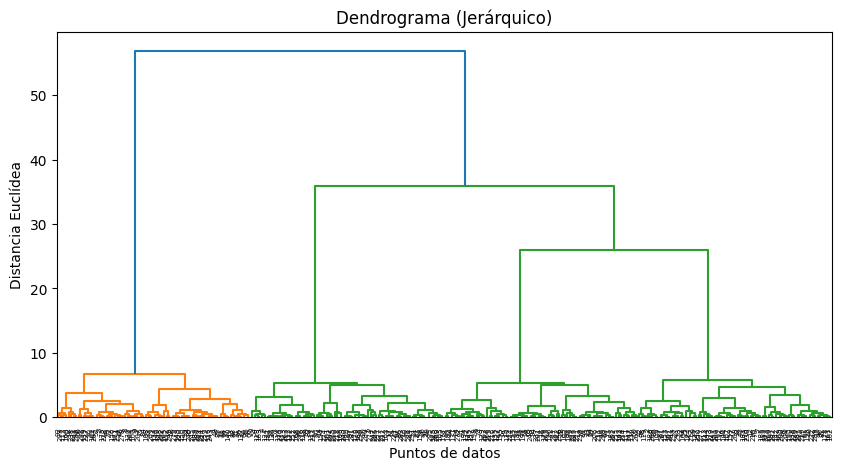

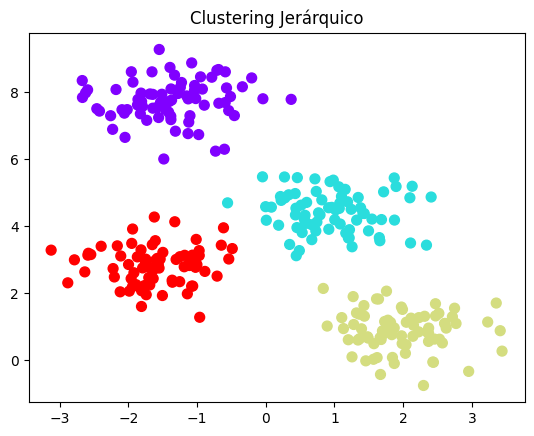

In [7]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

def jerarquico_sklearn():
    # Usamos los mismos datos X del ejemplo anterior
    # 1. Crear el Dendrograma para decidir el número de grupos
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
    plt.figure(figsize=(10, 5))
    dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title('Dendrograma (Jerárquico)')
    plt.xlabel('Puntos de datos')
    plt.ylabel('Distancia Euclídea')
    plt.show()
    # 2. Aplicar el clustering basado en el dendrograma
    hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
    y_hc = hc.fit_predict(X)
    # 3. Visualizar
    plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='rainbow')
    plt.title("Clustering Jerárquico")
    plt.show()
jerarquico_sklearn()

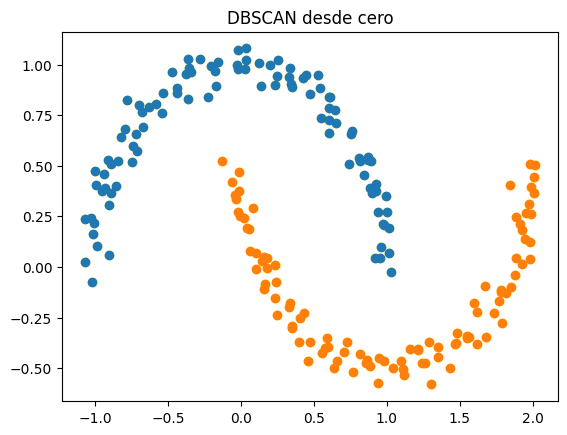

In [25]:
# clustering basado en densidades
import math
import random
from sklearn.datasets import make_moons
 
def distancia(p,q):
    s=0.0
    for i in range(len(p)):
        d=p[i]-q[i]
        s+=d*d
    return math.sqrt(s)

def vecinos(datos,punto,eps):
    N=[]
    for q in datos:
        if distancia(punto,q)<=eps:
            N.append(q)
    return N

def expandir_cluster(datos,p,vecinos_,cluster,visitado,eps,minPts):
    cluster.append(p)
    for vec in vecinos_:
        q = vec
        if tuple(q) not in visitado:
            visitado.add(tuple(q))
            vecinos_q = vecinos(datos,q,eps)
            if len(vecinos_q) >= minPts:
                for x in vecinos_q:
                    if x not in vecinos_:
                        vecinos_.append(x)
        if q not in cluster:
            cluster.append(q)

def dbscan(datos,eps,minPts):
    visitado=set()
    clusters=[]
    ruido=[]
    for punto in datos:
        if tuple(punto) in visitado:
            continue
        visitado.add(tuple(punto))
        vecinos_=vecinos(datos,punto,eps)
        if len(vecinos_)<minPts:
            ruido.append(punto)
        else:
            cluster=[]
            clusters.append(cluster)
            expandir_cluster(datos,punto,vecinos_,cluster,visitado,eps,minPts)
    return clusters,ruido


random.seed(0)
datos=[] 
for _ in range(30):
    datos.append([random.gauss(2,0.5),random.gauss(2,0.5)]) 
for _ in range(30):
    datos.append([random.gauss(7,0.5),random.gauss(7,0.5)]) 
for _ in range(10):
    datos.append([random.uniform(0,10),random.uniform(0,10)]) 
#clusters,ruido=dbscan(datos,eps=1.0,minPts=4)
X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)
X = X.tolist() 
clusters,ruido=dbscan(X,eps=0.3,minPts=5) 
xs = [p[0] for p in X]
ys = [p[1] for p in X]
#plt.scatter(xs,ys,c='yellow')
plt.scatter(xs,ys,c='yellow')
for cluster in clusters:
    xs=[p[0] for p in cluster]
    ys=[p[1] for p in cluster]
    plt.scatter(xs,ys)
#[        datos es una list   para acceder a sus elementos  usamos  xs ,ys  no datos[:,]
# [x1,y1],
# [x2,y2],
# ...
#]
if ruido:
    xr=[p[0] for p in ruido]
    yr=[p[1] for p in ruido]
    plt.scatter(xr,yr,marker='x')
plt.title("DBSCAN desde cero")
plt.show()

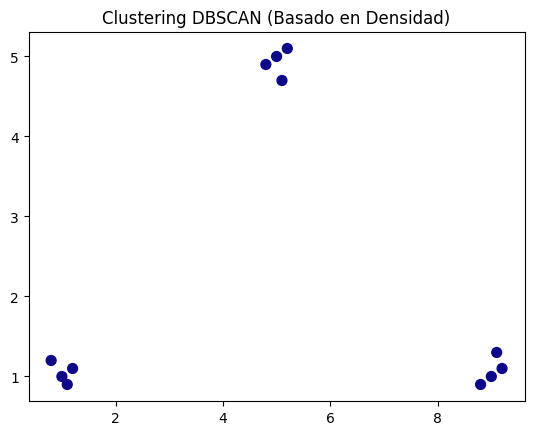

In [24]:
import matplotlib.pyplot as plt          
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# 1. Generar datos en forma de "lunas" (no esféricos)
#X_moons, _ = make_moons(n_samples=200, noise=0.05, random_state=0)
X_moons = np.array([[1,1],[1.2,1.1],[0.8,1.2],[1.1,0.9],[5,5],[5.2,5.1],[4.8,4.9],[5.1,4.7],[9,1],[9.2,1.1],[8.8,0.9],[9.1,1.3]])

# 2. Aplicar DBSCAN
# eps: radio de vecindad, min_samples: puntos mínimos para ser "denso"
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons)

# Nota: El color morado oscuro (etiqueta -1) suele representar el ruido
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan, s=50, cmap='plasma')
plt.title("Clustering DBSCAN (Basado en Densidad)")
plt.show()

In [38]:
# ELBOW
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blods

def codo():
    data = make_blods()
    print(data)

codo()

FileNotFoundError: [Errno 2] No such file or directory: 'Mall_Customers_data.csv'